In [ ]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset (using sklearn's built-in dataset)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
# Create a DataFrame for better visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
# Split the data into features and labels
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6917 - loss: 0.6071 - val_accuracy: 0.7033 - val_loss: 0.5336
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8256 - loss: 0.5019 - val_accuracy: 0.8352 - val_loss: 0.4443
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8909 - loss: 0.4047 - val_accuracy: 0.9121 - val_loss: 0.3719
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9326 - loss: 0.3427 - val_accuracy: 0.9011 - val_loss: 0.3194
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9378 - loss: 0.2808 - val_accuracy: 0.9011 - val_loss: 0.2796
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9424 - loss: 0.2663 - val_accuracy: 0.9011 - val_loss: 0.2499
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9597 - loss: 0.2207 - val_accuracy: 0.9121 - val_loss: 0.2264
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9664 - loss: 0.1839 - val_accuracy: 0.9011 - val_lo

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9616 - loss: 0.0982 
Test Accuracy: 0.9561


In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
# Print accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.9561


In [ ]:
# Plotting training & validation accuracy and loss
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

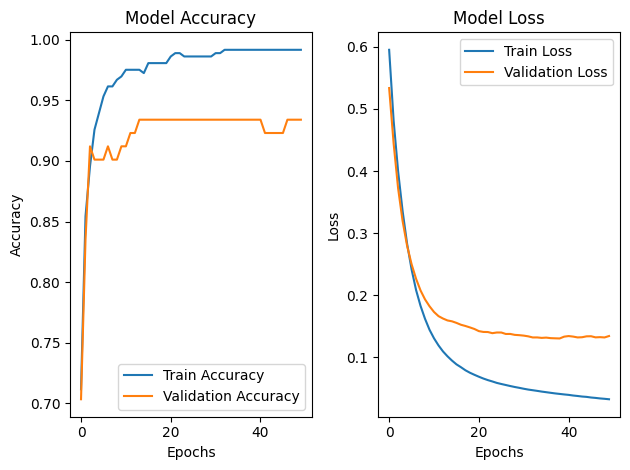

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()